<a href="https://colab.research.google.com/github/henriquesamuel/MVP/blob/main/MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de pacotes

# Carga de dataframe

In [3]:
#Buscando dataframe
filename = 'https://raw.githubusercontent.com/henriquesamuel/MVP/main/exams.csv'

#alterando cabaçalho
df = pd.read_csv(filename)
df.columns = ['Genero','Raça/etnia','Pais_edu','almoço', 'curso_prep', 'Pontos_matematica', 'Pontos_leitura', 'Pontos_redacao' ]

# Definição de atributos


*   Gender: o sexo do aluno (masculino/feminino) - Dado categórico nominal

*   Race/ethnicity: a origem racial ou étnica do aluno (asiática, afro-americana, hispânica, etc.) - Dado categórico nominal

*   Parental level of education: o nível mais alto de educação alcançado pelo(s) pai(s) ou tutor(es) do aluno - Dado categórico Ordinal

*   Lunch: Se o aluno recebe almoço gratuito ou a preço reduzido (sim/não) - Dado categórico nominal

*   Test preparation course: Se o aluno concluiu um curso de preparação para testes (sim/não) - Dado categórico nominal

*   Math score: a pontuação do aluno em um teste padronizado de matemática

*   Reading score: a pontuação do aluno em um teste de leitura padronizado

*   Writing score: a pontuação do aluno em um teste de redação padronizado

# Definição de problema

Definir impacto da realização de curso preparatório na aprovação ou não dos alunos

In [53]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as ms
from matplotlib import cm
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding
from IPython.display import display

# Análise de dados

# Informações Gerais e Estatísticas Descritivas

In [77]:
# Mostra as dimensões do dataframe
df.shape

(1000, 10)

Existe um total de 1.000 registros e 8 atributos

In [5]:
# Mostra as informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Genero             1000 non-null   object
 1   Raça/etnia         1000 non-null   object
 2   Pais_edu           1000 non-null   object
 3   almoço             1000 non-null   object
 4   curso_prep         1000 non-null   object
 5   Pontos_matematica  1000 non-null   int64 
 6   Pontos_leitura     1000 non-null   int64 
 7   Pontos_redacao     1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


As pontuações dos alunos são do tipo inteiro, enquanto os outros atributos são do tipo objeto 

In [6]:
# Mostra as 10 primeiras linhas do dataframe
df.head(10)

,Genero,Raça/etnia,Pais_edu,almoço,curso_prep,Pontos_matematica,Pontos_leitura,Pontos_redacao
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
5,male,group C,some high school,standard,none,68,57,54
6,female,group E,associate's degree,standard,none,82,83,80
7,female,group B,some high school,standard,none,46,61,58
8,male,group C,some high school,standard,none,80,75,73
9,female,group C,bachelor's degree,standard,completed,57,69,77


In [24]:
# Mostra as 10 últimas linhas do dataframe
df.tail(10)

,Genero,Raça/etnia,Pais_edu,almoço,curso_prep,Pontos_matematica,Pontos_leitura,Pontos_redacao,Media,Situacao
990,female,group C,some high school,standard,none,70,77,76,74.333333,Aprovado
991,female,group A,associate's degree,standard,none,72,77,77,75.333333,Aprovado
992,male,group A,associate's degree,free/reduced,completed,75,67,67,69.666667,Reprovado
993,male,group D,some high school,standard,none,83,74,80,79.000000,Aprovado
994,female,group B,associate's degree,standard,none,82,97,90,89.666667,Aprovado
995,male,group C,some college,standard,none,77,77,71,75.000000,Aprovado
996,male,group C,some college,standard,none,80,66,66,70.666667,Aprovado
997,female,group A,high school,standard,completed,67,86,86,79.666667,Aprovado
998,male,group E,high school,standard,none,80,72,62,71.333333,Aprovado
999,male,group D,high school,standard,none,58,47,45,50.000000,Reprovado


Após analisar o conjunto de registros iniciais e finais, percebe-se que 20% dos alunos dessa amostra não participaram de um curso preparatório

In [8]:
# Adionando nova coluna condicional onde média >= 70 -> "aprovado" caso contrário "reprovado"  
df['Media'] = df[['Pontos_matematica', 'Pontos_leitura', 'Pontos_redacao']].mean(axis=1)
df['Situacao'] = np.where(df['Media'] >= 70, 'Aprovado', 'Reprovado')

df.head()

,Genero,Raça/etnia,Pais_edu,almoço,curso_prep,Pontos_matematica,Pontos_leitura,Pontos_redacao,Media,Situacao
0,female,group D,some college,standard,completed,59,70,78,69.000000,Reprovado
1,male,group D,associate's degree,standard,none,96,93,87,92.000000,Aprovado
2,female,group D,some college,free/reduced,none,57,76,77,70.000000,Aprovado
3,male,group B,some college,free/reduced,none,70,70,63,67.666667,Reprovado
4,female,group D,associate's degree,standard,none,83,85,86,84.666667,Aprovado


O atributo "Situação" se enquadra na categoria de problemas de aprendizado supervisionado - Classificação

In [9]:
# Verificando valores missing
df.isnull().sum()

Genero               0
Raça/etnia           0
Pais_edu             0
almoço               0
curso_prep           0
Pontos_matematica    0
Pontos_leitura       0
Pontos_redacao       0
Media                0
Situacao             0
dtype: int64

<Axes: >

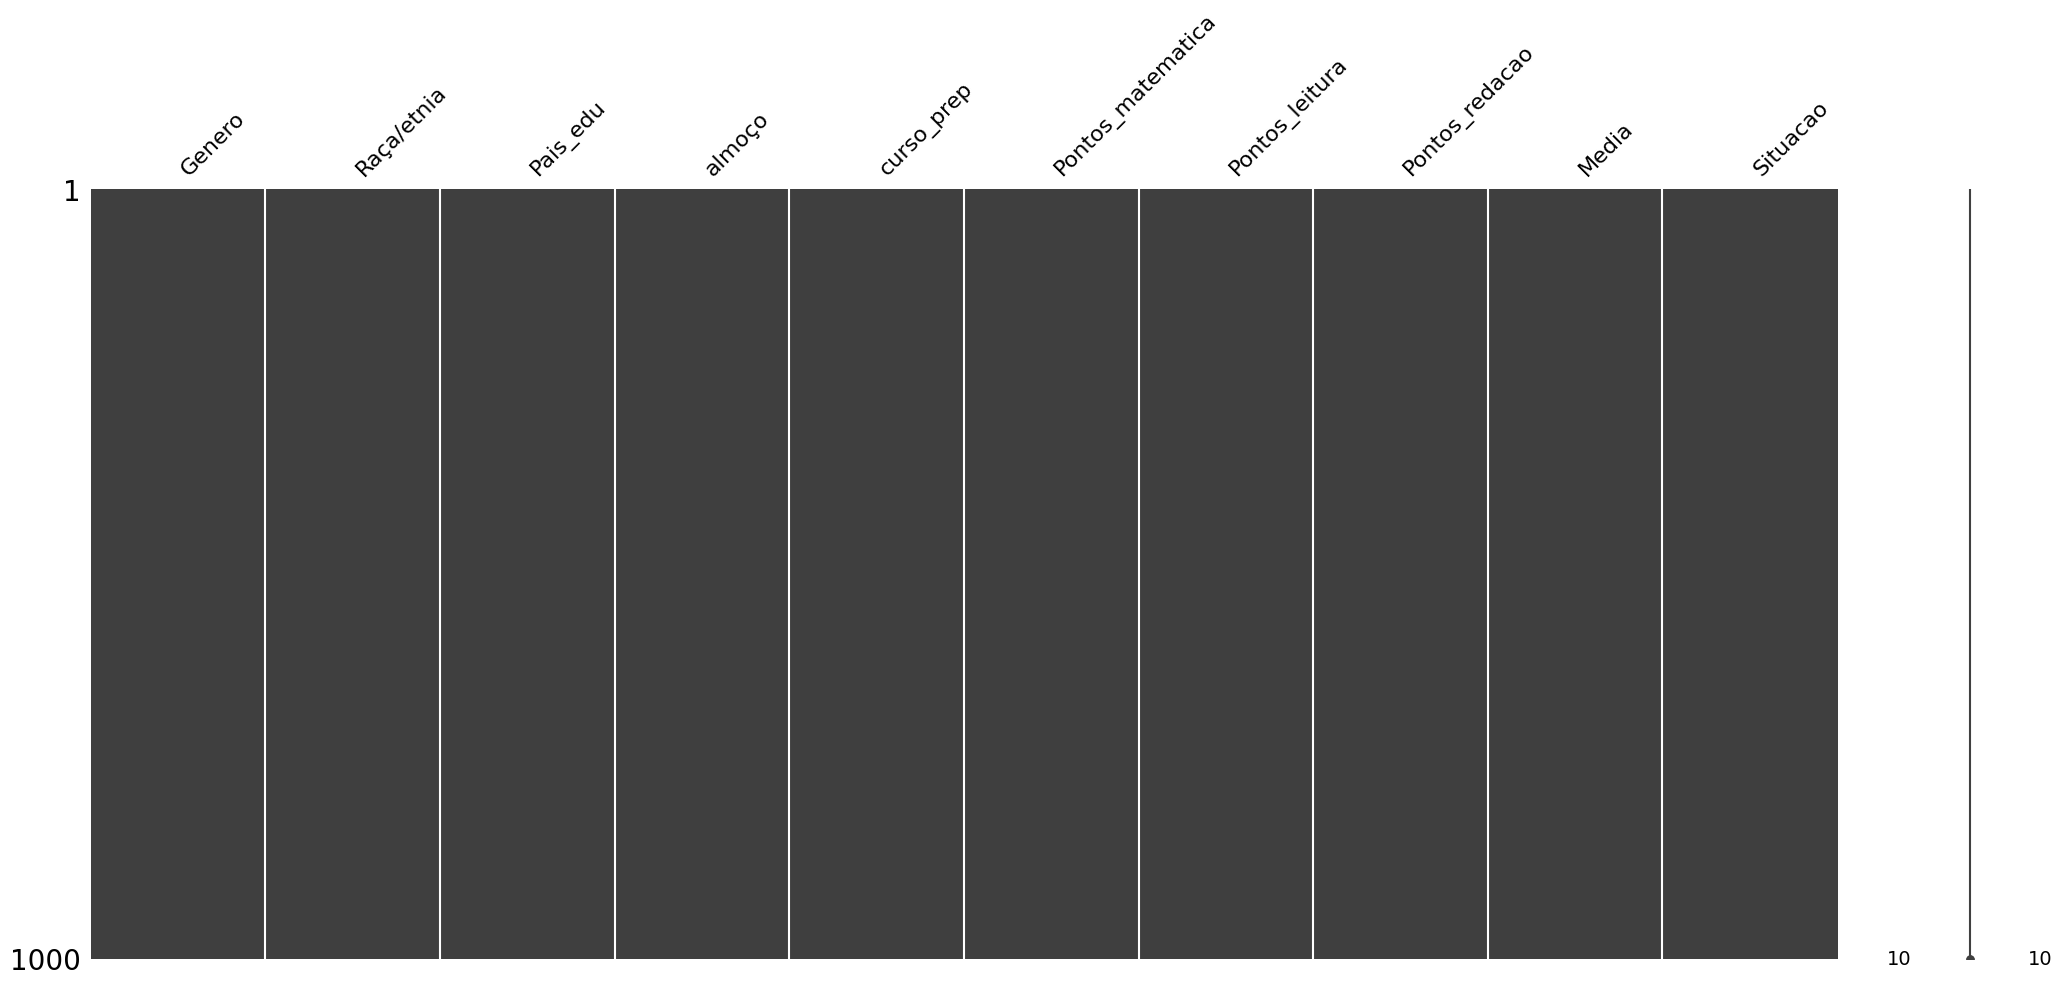

In [10]:
# exibindo visualização matricial da nulidade do dataframe
ms.matrix(df)

Não existem valores faltantes neste dataset

In [11]:
# Resumo estatístico do dataframe
df.describe()

,Pontos_matematica,Pontos_leitura,Pontos_redacao,Media
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000,69.110667
std,15.250196,14.107413,15.025917,14.027856
min,15.000000,25.000000,15.000000,20.000000
25%,58.000000,61.000000,59.000000,59.583333
50%,68.000000,70.500000,70.000000,69.666667
75%,79.250000,80.000000,80.000000,79.333333
max,100.000000,100.000000,100.000000,100.000000


1.   Os alunos tem melhor desempenho em matérias de humanas.
2.   Matéria com menor dispersão de pontos é a de Leitura.
3.   Matéria com maior dispersão de pontos é a de Matemática.
4.   Ocorreram casos de nota mámixa em todas as Matérias.

In [12]:
valor_max = 100
cont_mat = (df['Pontos_matematica'] == valor_max).sum()
cont_lei = (df['Pontos_leitura'] == valor_max).sum()
cont_red = (df['Pontos_redacao'] == valor_max).sum()
print('\nO número de alunos que alcançaram a nota máxima em matematica foi ', cont_mat)
print('\nO número de alunos que alcançaram a nota máxima em leitura foi ', cont_lei)
print('\nO número de alunos que alcançaram a nota máxima em redação foi ', cont_red)


O número de alunos que alcançaram a nota máxima em matematica foi  9

O número de alunos que alcançaram a nota máxima em leitura foi  10

O número de alunos que alcançaram a nota máxima em redação foi  13


In [90]:
# ordenando o dataframe por Média
df = df.sort_values(by='Media', ascending = False)

df

,Genero,Raça/etnia,Pais_edu,almoço,curso_prep,Pontos_matematica,Pontos_leitura,Pontos_redacao,Media,Situacao
857,male,group E,bachelor's degree,standard,completed,100,100,100,100.000000,Aprovado
378,male,group D,bachelor's degree,standard,completed,100,100,100,100.000000,Aprovado
566,male,group D,associate's degree,standard,completed,99,100,100,99.666667,Aprovado
921,male,group D,associate's degree,standard,completed,100,100,98,99.333333,Aprovado
772,female,group E,bachelor's degree,standard,completed,98,100,99,99.000000,Aprovado
...,...,...,...,...,...,...,...,...,...,...
513,female,group C,associate's degree,free/reduced,none,28,32,28,29.333333,Reprovado
982,male,group C,some high school,standard,none,28,27,23,26.000000,Reprovado
376,male,group C,high school,standard,none,31,27,19,25.666667,Reprovado
480,female,group C,high school,standard,none,21,30,26,25.666667,Reprovado


Os alunos com as maiores notas realizaram de algum curso preparatório

---
Os alunos com as piores notas não realizaram nenhum curso preparatório


In [98]:
# exibindo a média de cada atributo, agrupado por situação
df.groupby('curso_prep').mean()

,Pontos_matematica,Pontos_leitura,Pontos_redacao,Media
curso_prep,,,,
completed,70.334302,74.726744,75.808140,73.623062
none,66.486280,68.103659,65.643293,66.744411


O maior melhora de perfomance se deu na matéria de redação

# Visualizações Unimodais

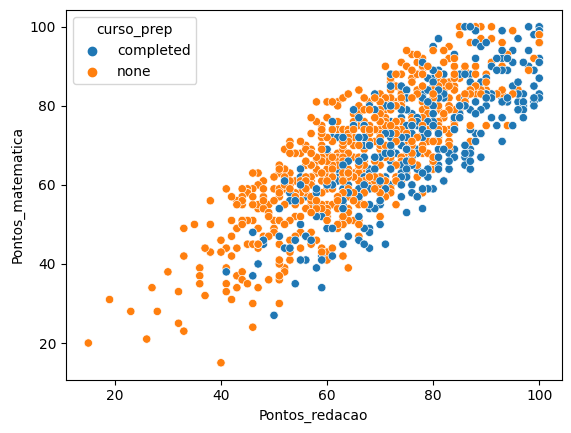

In [138]:
# scatter plot com Seaborn colorido por classes
sns.scatterplot(x='Pontos_redacao', y='Pontos_matematica', hue='curso_prep', data=df);

Pode-se verificar uma alta correlação entre as matérias.  

---
Todas as médias que ficaram abaixo de 40 pontos são de alunos que não realizaram cursos preparatórios


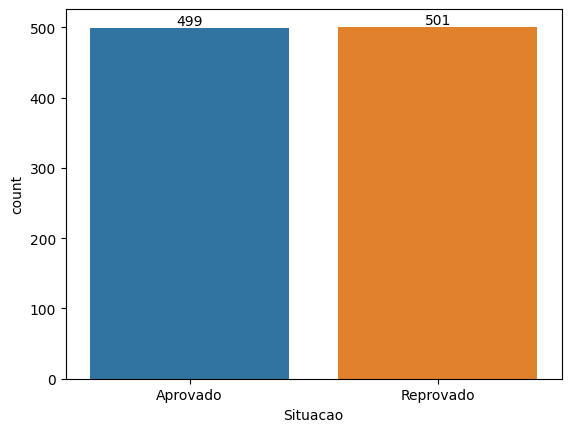

In [141]:
# contar número de alunos aprovados e reprovados
contagem = df.groupby('Situacao')['Media'].count().reset_index()

# plotar gráfico de barras
sns.countplot(data=df, x='Situacao')

# adicionar rótulos de dados
for a, b in enumerate(contagem['Media']):
    plt.annotate(str(b), (a, b), ha='center', va='bottom')

# exibir gráfico
plt.show()



Considerando a média de aprovação igual a 70 pontos temos basicamente o mesmo número ocorrencias de aprovados e reprovados. Porém ao abaixar a média de aprovação para 50 pontos, temos a seguinte situação:

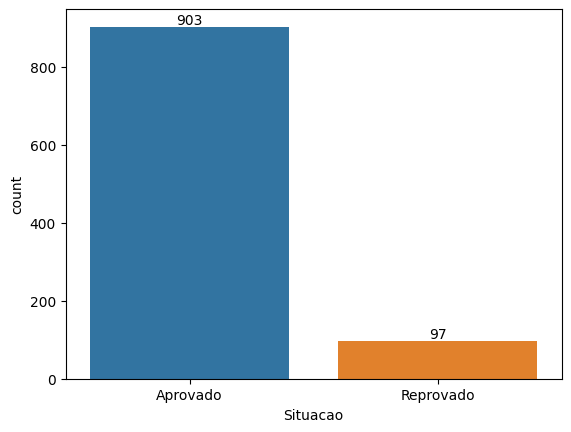

In [136]:
# Adionando nova coluna condicional onde média >= 50 -> "aprovado" caso contrário "reprovado"  
df_low = pd.read_csv(filename)

df_low['Media'] = df[['Pontos_matematica', 'Pontos_leitura', 'Pontos_redacao']].mean(axis=1)
df_low['Situacao'] = np.where(df['Media'] >= 50, 'Aprovado', 'Reprovado')

# contar número de alunos aprovados e reprovados
contagem = df_low.groupby('Situacao')['Media'].count().reset_index()

# plotar gráfico de barras
sns.countplot(data=df_low, x='Situacao')

# adicionar rótulos de dados
for a, b in enumerate(contagem['Media']):
    plt.annotate(str(b), (a, b), ha='center', va='bottom')

# exibir gráfico
plt.show()

Isso acontece por conta da alta concentração de ocorrencias na intervalo de 60 a 70 pontos, como indicado no boxplot abaixo

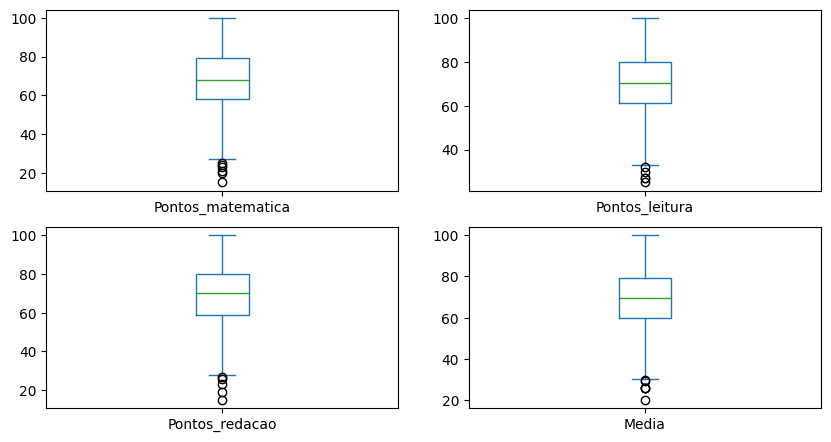

In [142]:
# Boxplot
df.plot(kind = 'box', subplots = True, layout = (3,2), sharex = False, sharey = False, figsize = (10,8))
plt.show()

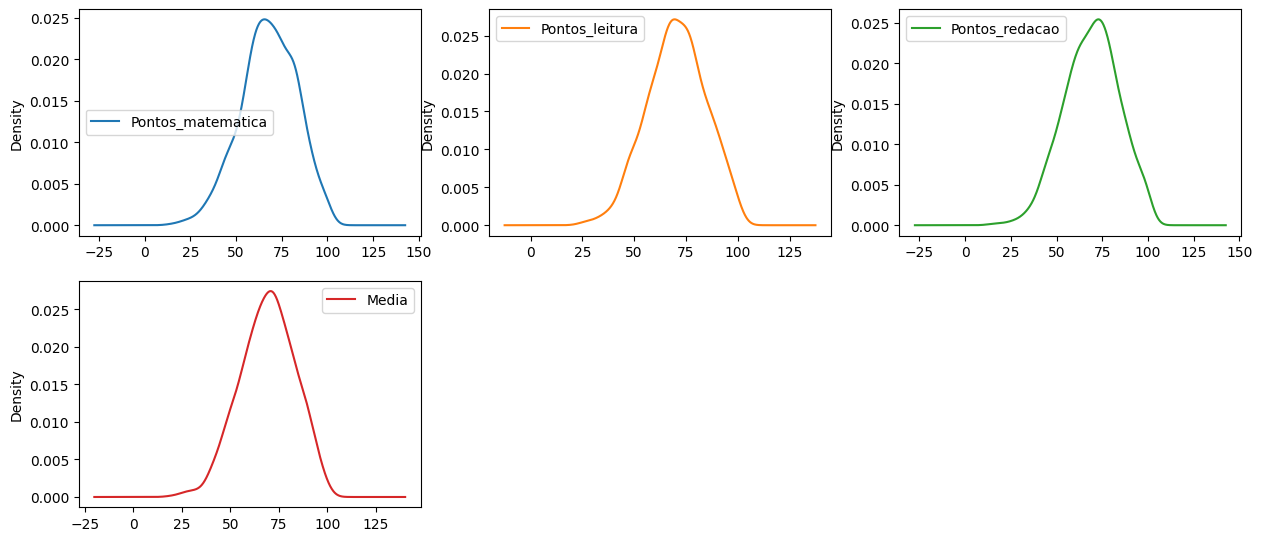

In [15]:
# Density Plot
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

# Visualizações Multimodais

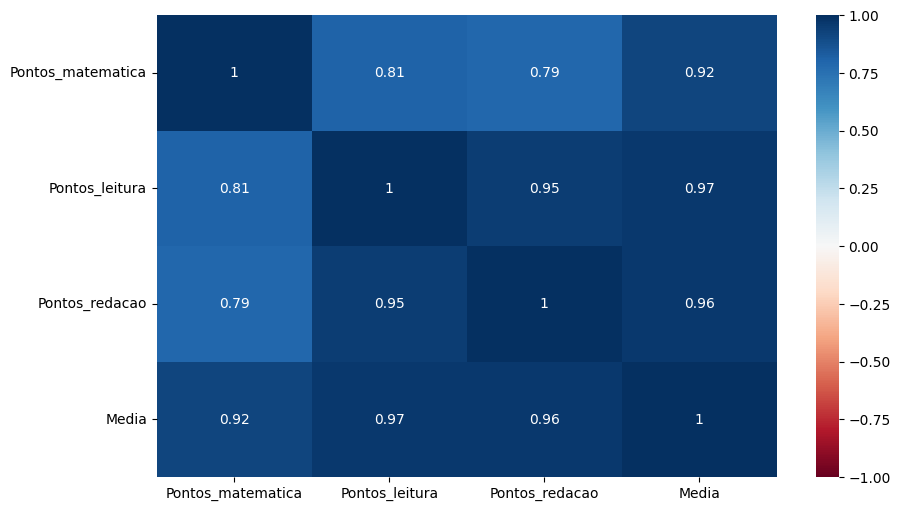

In [20]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

Podemos verificar que a pontuação em leitura está altamente relacioanada com os pontos de redação

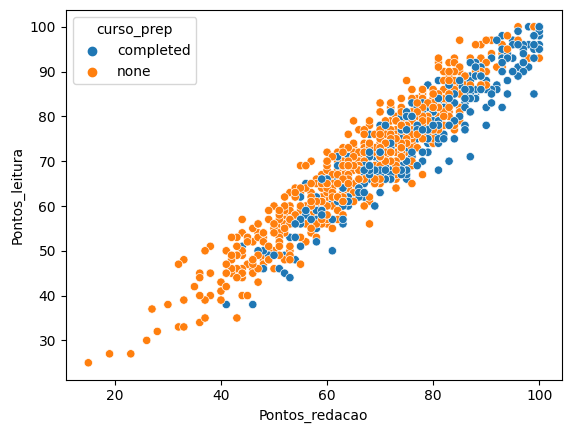

In [123]:
# scatter plot com Seaborn colorido por classes
sns.scatterplot(x='Pontos_redacao', y='Pontos_leitura', hue='curso_prep', data=df);

Exibição da correlação Leitura x Redação

Text(0.5, 1.0, 'Pontos_redacao')

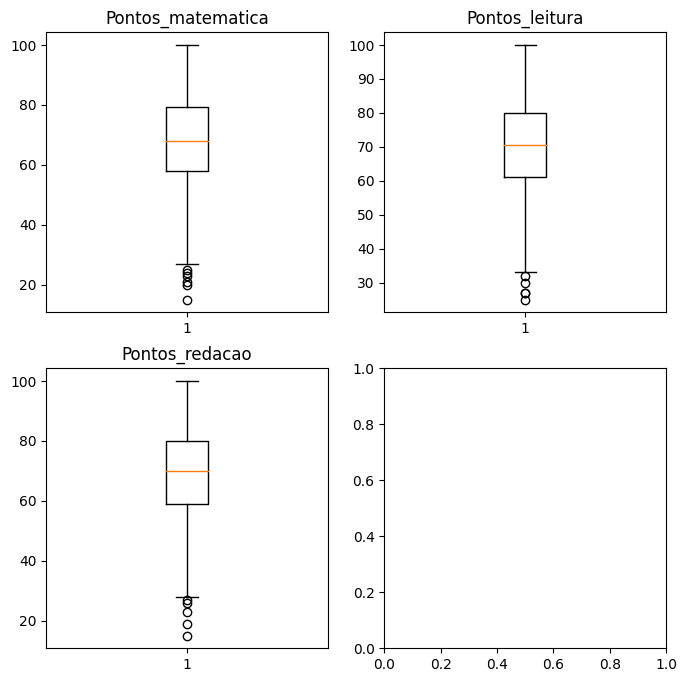

In [112]:
# configurando um grupo de subplots em um grid de 1 linha e 2 colunas
# e também o tamanho da figura
fig, ax = plt.subplots(2,2, figsize = (8, 8))

# subplot1: box do comprimento_sepala
ax[0,0].boxplot(df['Pontos_matematica'])
ax[0,0].set_title("Pontos_matematica")

# subplot2: box da largura_sepala
ax[0,1].boxplot(df['Pontos_leitura'])
ax[0,1].set_title("Pontos_leitura")

# subplot3: box do comprimento_petala
ax[1,0].boxplot(df['Pontos_redacao'])
ax[1,0].set_title("Pontos_redacao")


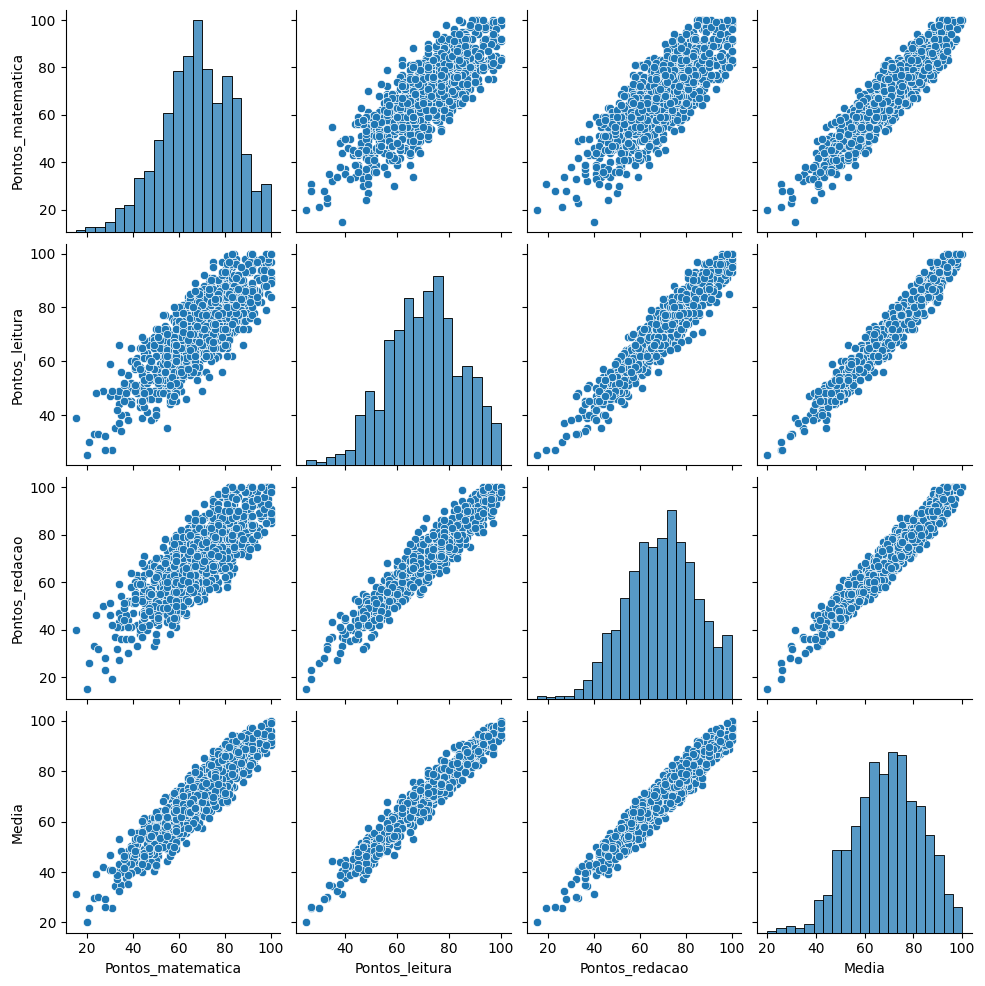

In [21]:
# Scatter Plot com Seaborn - Variação 1
sns.pairplot(df)

Podemos verificar a baixa dispersão da materia "Leitura", que teve a maior consistência de notas.

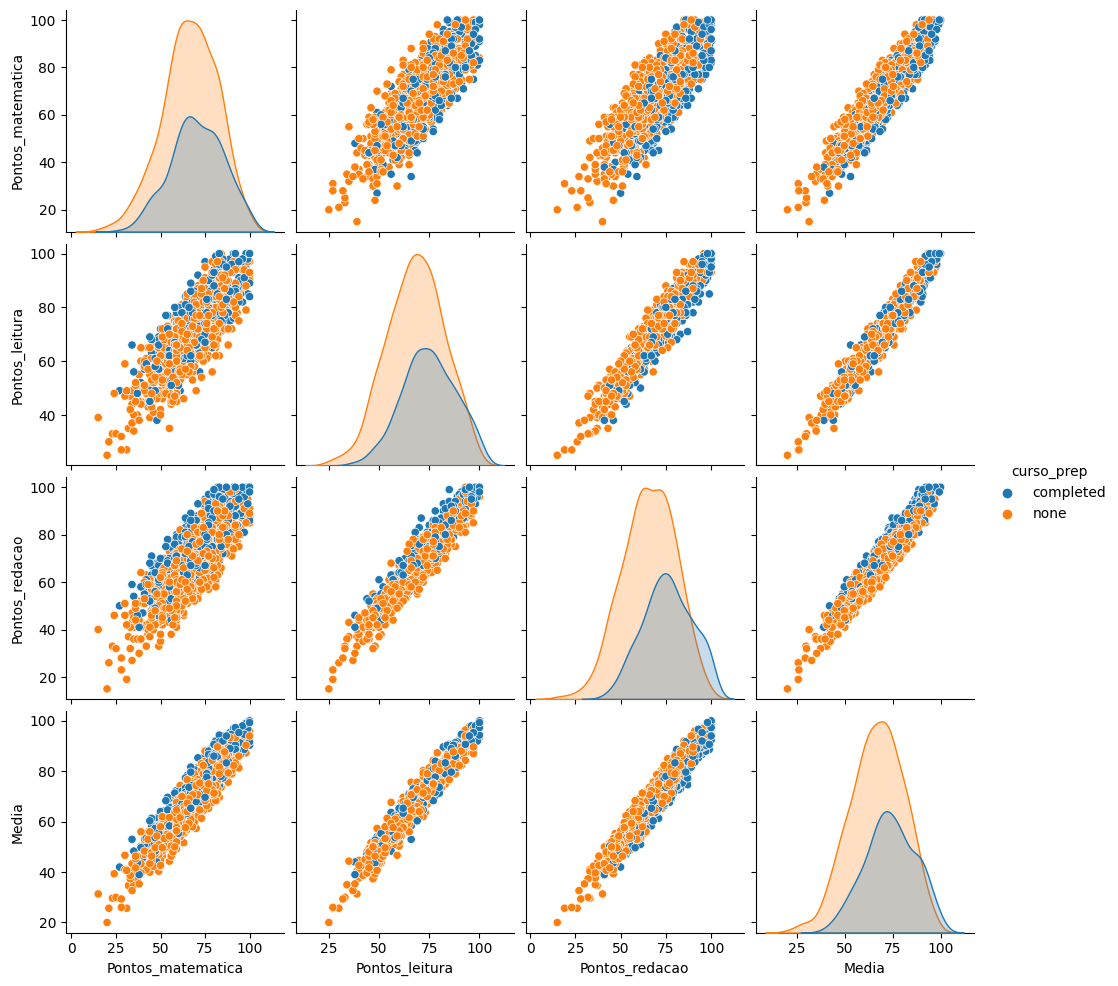

In [22]:
# Scatter Plot com Seaborn - Considerando curso preparatório
sns.pairplot(df, hue = "curso_prep", height = 2.5);

Alunos que realizaram curso preparatório tem o melhor desempenho

# Transformações Numéricas

# Padronização

In [49]:
# definindo o transformador como one hot encoding para attributos categóricos
encoder = OneHotEncoder(sparse=False)

# transformando os dados
onehot = encoder.fit_transform(df)
print(onehot)

[[1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 ...
 [1. 0. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 1.]]


Foi utilizado o OneHotEncoder por se tratar atributos nominais

In [116]:
# definindo o transformador como one hot encoding (com Dummy variable encoder)
encoder = OneHotEncoder(drop='first', sparse=False)

# transformando os dados
dummy = encoder.fit_transform(df)
print(dummy)

[[1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 ...
 [1. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 0. 1.]]
